# Airbnb Prices in European Cities

**We will build a machine learning model to predict the prices of Airbnb listings**

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import os

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
# Installing opendatasets library to download the dataset
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od

In [4]:
# Path to the dataset on kaggle website
dataset = r"https://www.kaggle.com/datasets/thedevastator/fashion-products-on-amazon-ratings-prices-and-pa"

In [5]:
# Downloading the dataset
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nipungupta26
Your Kaggle Key: ··········


100%|██████████| 8.20M/8.20M [00:00<00:00, 130MB/s]

In [6]:
# Directory of the downloaded datasets in local system
data_dir = r'/content/fashion-products-on-amazon-ratings-prices-and-pa'

In [7]:
# Listing out the datasets
os.listdir(data_dir)

['amazon_co-ecommerce_sample.csv']

In [8]:
df = pd.read_csv('/content/fashion-products-on-amazon-ratings-prices-and-pa/amazon_co-ecommerce_sample.csv', index_col=0)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
index,,,,,,,,,,,,,,,,,
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."


In [11]:
df.nunique()

uniq_id                                        10000
product_name                                    9964
manufacturer                                    2651
price                                           2625
number_available_in_stock                         89
number_of_reviews                                194
number_of_answered_questions                      19
average_review_rating                             19
amazon_category_and_sub_category                 255
customers_who_bought_this_item_also_bought      8755
description                                     8514
product_information                             9939
product_description                             8514
items_customers_buy_after_viewing_this_item     6749
customer_questions_and_answers                   910
customer_reviews                                9901
sellers                                         6581
dtype: int64

In [12]:
df = df.drop(['uniq_id', 'product_name', 'customers_who_bought_this_item_also_bought', 'description', 'product_information', 'product_description', 'items_customers_buy_after_viewing_this_item'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      9993 non-null   object 
 1   price                             8565 non-null   object 
 2   number_available_in_stock         7500 non-null   object 
 3   number_of_reviews                 9982 non-null   object 
 4   number_of_answered_questions      9235 non-null   float64
 5   average_review_rating             9982 non-null   object 
 6   amazon_category_and_sub_category  9310 non-null   object 
 7   customer_questions_and_answers    914 non-null    object 
 8   customer_reviews                  9979 non-null   object 
 9   sellers                           6918 non-null   object 
dtypes: float64(1), object(9)
memory usage: 859.4+ KB


The dataset contains **51707** rows and **21** columns. Also, there are no missing values

### About the dataset

This dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities. Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends. Using spatial econometric methods, we can analyse and identify the determinants of Airbnb prices across these cities. The dataset includes information such as realSum (the total price of the listing), room_type (private/shared/entire home/apt), host_is_superhost (boolean value indicating if host is a superhost or not), multi (indicator whether listing is for multiple rooms or not), biz (business indicator) , guest_satisfaction_overall (overall rating from guests camparing all listings offered by host ), bedrooms, dist (distance from city center) , lng & lat coordinates for location identification etc. The objective is to offer insight into how global markets are affected by social dynamics and geographical factors which in turn determine pricing strategies for optimal profitability!

**realSum**:	The total price of the Airbnb listing. (Numeric)

**room_type**:	The type of room being offered (e.g. private, shared, etc.). (Categorical)

**room_shared**:	Whether the room is shared or not. (Boolean)

**room_private**:	Whether the room is private or not. (Boolean)

**person_capacity**;	The maximum number of people that can stay in the room. (Numeric)

**host_is_superhost**:	Whether the host is a superhost or not. (Boolean)

**multi**:	Whether the listing is for multiple rooms or not. (Boolean)

**biz**:	Whether the listing is for business purposes or not. (Boolean)

**cleanliness_rating**:	The cleanliness rating of the listing. (Numeric)

**guest_satisfaction_overall**:	The overall guest satisfaction rating of the listing. (Numeric)

**bedrooms**:	The number of bedrooms in the listing. (Numeric)

**dist**:	The distance from the city centre. (Numeric)

**metro_dist**:	The distance from the nearest metro station. (Numeric)

**lng**:	The longitude of the listing. (Numeric)

**lat**:	The latitude of the listing. (Numeric)

In [14]:
df.dtypes

manufacturer                         object
price                                object
number_available_in_stock            object
number_of_reviews                    object
number_of_answered_questions        float64
average_review_rating                object
amazon_category_and_sub_category     object
customer_questions_and_answers       object
customer_reviews                     object
sellers                              object
dtype: object

In [15]:
import re

In [16]:
df['price'] = [re.sub('£', '', str(e)) for e in df['price']]

In [17]:
df['price'] = [re.sub(',', '', str(e)) for e in df['price']]

In [18]:
df[df['price'] == '269.00 - 699.99']

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customer_questions_and_answers,customer_reviews,sellers
index,,,,,,,,,,
1655,Bestway,269.00 - 699.99,NaN,1,1.0,5.0 out of 5 stars,NaN,NaN,Five Stars // 5.0 // 26 Dec. 2014 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Playtimes"", ""Se..."


In [19]:
for i, e in enumerate(df['price']):
  matcher = re.finditer('-', e)
  for m in matcher:
    df = df[df['price'] != e]

In [20]:
df['price'] = df['price'].astype(float)

In [21]:
df['number_available_in_stock'] = [re.sub('\s[a-zA-Z]+', '', str(e)) for e in df['number_available_in_stock']]

In [22]:
df['number_available_in_stock'] = df['number_available_in_stock'].astype(float)

In [23]:
df['number_of_reviews'] = [re.sub(',', '', str(e)) for e in df['number_of_reviews']]

In [24]:
df['number_of_reviews'] = df['number_of_reviews'].astype(float)

In [25]:
df['average_review_rating'] = [re.sub(' out of 5 stars', '', str(e)) for e in df['average_review_rating']]

In [26]:
df['average_review_rating'] = df['average_review_rating'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      9975 non-null   object 
 1   price                             8547 non-null   float64
 2   number_available_in_stock         7500 non-null   float64
 3   number_of_reviews                 9964 non-null   float64
 4   number_of_answered_questions      9218 non-null   float64
 5   average_review_rating             9964 non-null   float64
 6   amazon_category_and_sub_category  9294 non-null   object 
 7   customer_questions_and_answers    913 non-null    object 
 8   customer_reviews                  9961 non-null   object 
 9   sellers                           6906 non-null   object 
dtypes: float64(5), object(5)
memory usage: 857.8+ KB


Description about numerical features

In [28]:
df.describe()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
count,8547.000000,7500.000000,9964.000000,9218.000000,9964.000000
mean,20.251406,7.916933,9.123244,1.834454,4.707658
std,46.314450,8.805777,33.723984,2.517194,0.372163
min,0.010000,1.000000,1.000000,1.000000,2.300000
25%,4.990000,3.000000,1.000000,1.000000,4.500000
50%,10.560000,5.000000,2.000000,1.000000,5.000000
75%,19.990000,10.000000,6.000000,2.000000,5.000000
max,2439.920000,92.000000,1399.000000,39.000000,5.000000


Description about categorical features

In [29]:
df.describe(include=['O'])

,manufacturer,amazon_category_and_sub_category,customer_questions_and_answers,customer_reviews,sellers
count,9975,9294,913,9961,6906
unique,2650,255,909,9884,6569
top,LEGO,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,Is it 12 days or 24? // 24,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
freq,171,880,2,5,27


# Data Leakage

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

In [30]:
df.duplicated(subset=None, keep='first').sum()

11

In [31]:
df.shape

(9982, 10)

In [32]:
df = df[df.duplicated(df.columns.tolist(), keep='first')==False]

In [33]:
df.duplicated(subset=None, keep='first').sum()

0

There are no duplicate values in the data

In [34]:
df.reset_index(inplace = True, drop = True)

#### Splitting the dataset into training and testing datasets

In [35]:
X = df.drop(columns=["price"], axis=1)
Y = df.price

In [36]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle=True)

Resetting the indices for the training dataframes

In [37]:
X_train.reset_index(inplace = True, drop = True)

In [38]:
y_train.reset_index(inplace = True, drop = True)

Joining the training dataframe

In [39]:
df_train = X_train.join(y_train, how='inner')

Resetting the indices for the testing dataframes

In [40]:
X_test.reset_index(inplace = True, drop = True)

In [41]:
y_test.reset_index(inplace = True, drop = True)

Joining the testing dataframe

In [42]:
df_test = X_test.join(y_test, how='inner')

## Data Preprocessing and cleaning in the training dataframe

In [44]:
df_train.isnull().sum()

manufacturer                           5
number_available_in_stock           1726
number_of_reviews                     14
number_of_answered_questions         535
average_review_rating                 14
amazon_category_and_sub_category     465
customer_questions_and_answers      6350
customer_reviews                      16
sellers                             2173
price                               1029
dtype: int64

In [45]:
(df_train.isnull().sum()/len(df_train))*100

manufacturer                        0.000716
number_available_in_stock           0.247313
number_of_reviews                   0.002006
number_of_answered_questions        0.076659
average_review_rating               0.002006
amazon_category_and_sub_category    0.066628
customer_questions_and_answers      0.909872
customer_reviews                    0.002293
sellers                             0.311363
price                               0.147442
dtype: float64

In [46]:
for feature in df_train.columns:
  if (df_train[feature].isnull().sum()/len(df_train))*100 > 90:
    df_train = df_train.drop([feature], axis=1)
  elif (df_train[feature].isnull().sum()/len(df_train))*100 <= 1:
    df_train = df_train.dropna(subset=[feature])

In [51]:
(df_train.isnull().sum()/len(df_train))*100

manufacturer                         0.000000
number_available_in_stock           24.719747
number_of_reviews                    0.000000
number_of_answered_questions         7.674619
average_review_rating                0.000000
amazon_category_and_sub_category     6.596723
customer_reviews                     0.000000
sellers                             31.187123
price                               14.716873
dtype: float64

In [57]:
NaN_features = [feature for feature in df_train.iloc[:, :-1].columns if (df_train[feature].count() < df_train.shape[0]) and (feature in df_train.select_dtypes(np.number).columns)]
NaN_features

['number_available_in_stock', 'number_of_answered_questions']

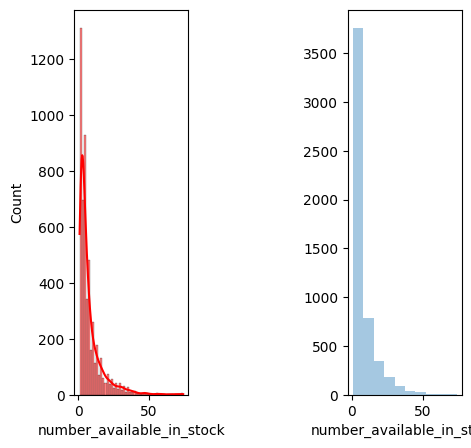

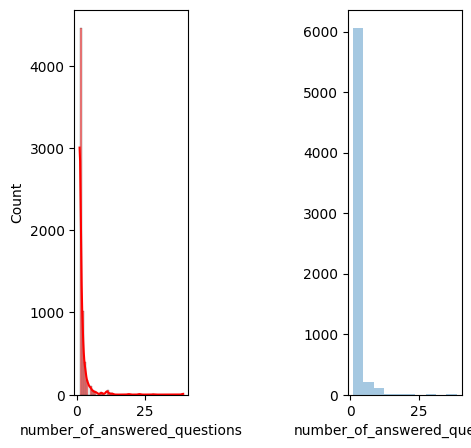

In [58]:
for feature in NaN_features:
    plt.figure(figsize=(5,5))
    plt.subplot(1,3,1)
    #sns.distplot(df_train[feature], color='red')
    sns.histplot(x = df_train[feature].dropna(), kde = True, color='red', bins=50)
    plt.subplot(1,3,3)
    #plt.hist(df_train[feature], bins=20)
    sns.distplot(df_train[feature], bins=10, kde = False)

#### Extracting the predictor continuous features from the training data

In [ ]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['realSum', 'person_capacity', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms']]

In [ ]:
continuous_features

#### Plotting Boxplot and Q-Q plot to identify Univariate outliers

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
      plt.figure(figsize=(5,5))
      plt.ticklabel_format(style='plain')
      plt.suptitle("Boxplot and Q-Q plot of " + feature, fontweight="bold", fontsize=15)
      #dataset.boxplot(column=feature)
      plt.subplot(2,3,1)
      sns.boxplot(y=feature, data=dataset, color='orange')
      #plt.ylabel(feature)
      #plt.title(feature)
      plt.subplot(2,3,3)
      stat.probplot(dataset[feature], dist='norm', plot=pylab)
      plt.show()

In [ ]:
create_boxplots(df_train, continuous_features)

Defining function to remove the univariate outliers

In [ ]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        #print(feature, lower_bridge)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        #print(feature, upper_bridge)
        if lower_bridge != upper_bridge:
          dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
          dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge
        else:
          lower_bridge = dataset[feature].quantile(0.25)/2
          upper_bridge = dataset[feature].quantile(0.75) * 2
          dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
          dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [ ]:
remove_outliers(df_train, continuous_features)

In [ ]:
create_boxplots(df_train, continuous_features)

The univariate outliers have been treated

#### Plotting histograms and distplots to check the distributions of continuous variables

In [ ]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.suptitle("Histogram and Q-Q plot of variable " + feature, fontweight="bold", fontsize=15)
        plt.subplot(3,5,1)
        plt.ticklabel_format(style='plain')
        #plt.hist(dataset[feature].dropna())
        sns.histplot(x = dataset[feature].dropna(), kde = True)
        plt.title(feature)
        plt.subplot(3,5,3)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.ylabel('Count/Frequency')
        plt.subplot(3,5,5)
        stat.probplot(dataset[feature], dist='norm', plot=pylab)
        plt.show()

In [ ]:
create_histograms_distplots(df_train, continuous_features)

From the above plots, it can observed that the features are skewed

#### Performing transformation to remove skeweness

In [ ]:
from scipy.stats import skew

In [ ]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    square_root_transformed_skew_scores = []
    log_transformed_skew_scores = []
    #exp_transformed_skew_scores = []
    #boxcox_transformed_skew_scores = []
    for feature in feature_list:
      column_name_square_root = ''
      column_name_log = ''
      variables.append(feature)
      skew_scores.append(skew(dataset[feature]))
      #print(feature, skew(dataset[feature]))
      if (float(skew(dataset[feature])) >= 0.5) | (float(skew(dataset[feature])) <= -0.5): 
        if dataset[feature].min() > 0:
          #column_name_square_root = f'{str(feature)} square root transformed'
          #dataset[column_name_square_root] = np.sqrt(dataset[feature])
          dataset[feature] = np.sqrt(dataset[feature])
          #column_name_log = f'{str(feature)} log transformed'
          #dataset[column_name_log] = np.log(dataset[feature])
          #dataset[feature] = np.log(dataset[feature])
          #square_root_transformed_skew_scores.append(skew(dataset[column_name_square_root]))
          square_root_transformed_skew_scores.append(skew(dataset[feature]))
          #log_transformed_skew_scores.append(skew(dataset[column_name_log]))
          #log_transformed_skew_scores.append(skew(dataset[feature]))
        else:
          square_root_transformed_skew_scores.append('Not transformed')
          #log_transformed_skew_scores.append('Not transformed')
        #column_name_exp = f'{str(feature)} exp transformed'
        #dataset[feature] = np.exp(dataset[feature])
        #exp_transformed_skew_scores.append(skew(dataset[feature]))
        #boxcox_transformed_skew_scores.append(skew(dataset[column_name_exp]))
      else:
        #pass
        square_root_transformed_skew_scores.append('Not transformed')
        #log_transformed_skew_scores.append('Not transformed')
        #exp_transformed_skew_scores.append('Not transformed')
        #boxcox_transformed_skew_scores.append('Not transformed')
    #print(len(variables))
    #print(len(skew_scores))
    #print(len(square_root_transformed_skew_scores))
    #print(len(log_transformed_skew_scores))
    #print(skew_scores)
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores, 'Skewness score after boxcox transformation of skewed features': boxcox_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores}
    skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores}
    skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [ ]:
skewness_score(df_train, continuous_features)

In [ ]:
create_histograms_distplots(df_train, continuous_features)

The skewness has been handled using **square root transformation**

#### Plotting relplot

In [ ]:
def create_relplot(dataset, list_of_features, target):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(7,7))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue=target)
                plt.show()

In [ ]:
create_relplot(df_train, continuous_features[:3], 'realSum')

In [ ]:
df_train.info()

In [ ]:
pd.pivot_table(df_train, index='room_type', values=continuous_features, aggfunc=['median'])

In [ ]:
pd.pivot_table(df_train, index='room_shared', values=continuous_features, aggfunc=['median'])

In [ ]:
pd.pivot_table(df_train, index='room_private', values=continuous_features, aggfunc=['median'])

In [ ]:
pd.pivot_table(df_train, index='host_is_superhost', values=continuous_features, aggfunc=['median'])

In [ ]:
pd.pivot_table(df_train, index='multi', values=continuous_features, aggfunc=['median'])

In [ ]:
pd.pivot_table(df_train, index='biz', values=continuous_features, aggfunc=['median'])

In [ ]:
pd.pivot_table(df_train, index='city', values=continuous_features, aggfunc=['median'])

In [ ]:
pd.pivot_table(df_train, index='day', values=continuous_features, aggfunc=['median'])

In [ ]:
df_train.groupby(['city', 'day'])[['day']].count().sort_values(['city']).rename(columns={'day':'Count'})

In [ ]:
df_train.groupby(['city', 'room_type'])[['room_type']].count().sort_values(['city']).rename(columns={'room_type':'Count'})

In [ ]:
df_train.groupby(['city', 'biz'])[['biz']].count().sort_values(['city']).rename(columns={'biz':'Count'})

In [ ]:
df_train.groupby(['room_type', 'room_shared'])[['room_shared']].count().sort_values(['room_type']).rename(columns={'room_shared':'Count'})

In [ ]:
df_train.groupby(['room_type', 'room_private'])[['room_private']].count().sort_values(['room_type']).rename(columns={'room_private':'Count'})

It can be observed that **room_shared** is True for all **Shared rooms**. So we can drop **room_shared** column

It can be observed that **room_private** is True for all **Private rooms**. So we can drop **room_private** column

In [ ]:
df_train = df_train.drop(['room_private', 'room_shared'], axis = 1)

#### Extracting the categorical features

In [ ]:
categorical_features = [feature for feature in df_train.columns if feature not in continuous_features and feature != 'realSum']

In [ ]:
categorical_features

Checking the unique values in the categorical columns

In [ ]:
df_train[categorical_features].nunique()

In [ ]:
for feature in categorical_features:
  plt.figure(figsize=(5,5))
  df_train.groupby(feature)['realSum'].median().plot()
  plt.xlabel(feature)
  plt.ylabel('Median Price')
  plt.title(f'{feature} vs Median Price')
  plt.show()

From the above plots, the following conclusions can be made:

 - The median price is higher for **Entire home/apt** as compared to **private** and **shared** room

 - As the **person_capacity** increases, the median price increases

 - The median price is high if the host is not a **super host**

 - The median price is high for listings with non multiple rooms **multi=0**

 - The median price is high for listings meant for business purpose **biz=1**

 - The median price is highest for **cleanliness_rating = 4** and lowest for **cleanliness_rating = 5**

 - The median price is highest for **guest_satisfaction_overall = 50** and lowest for **cleanliness_rating = 60**

 - The median price is highest when **bedrooms = 6**

 - The median price is highest for **Amsterdam**

 - The median price is high during **weekdays** than during **weekends**

In [ ]:
for feature in categorical_features:
  plt.figure(figsize=(4,4))
  sns.jointplot(y='realSum', x=feature, data=df_train)
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.title(f'{feature} vs Price')
  plt.show()

In [ ]:
for feature in categorical_features:
  df_train.groupby(feature)['realSum'].median().plot(kind='bar')
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.show()

In [ ]:
for feature in categorical_features:
    #print('Unique categories in the feature', feature, ': ', df_train[feature].nunique(), 'labels')
    if df_train[feature].nunique() <= 12:
      #print(df_train[feature].value_counts())
      plt.figure(figsize=(5,5))
      ax = sns.countplot(x=feature, data=df_train)
      for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))
      sns.catplot(x=feature, y='realSum', data=df_train, hue='guest_satisfaction_overall')
      plt.show()

Label encoding of **room_type**

In [ ]:
df_train['room_type'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_room_type = LabelEncoder()

In [ ]:
df_train['room_type'] = label_room_type.fit_transform(df_train['room_type'])

In [ ]:
df_train['room_type'].value_counts()

One hot encoding of categorical and boolean features

In [ ]:
categorical_object_features = [feature for feature in df_train.select_dtypes(np.object).columns]

In [ ]:
categorical_object_features

In [ ]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [ ]:
categorical_bool_features = [feature for feature in df_train.select_dtypes(np.bool).columns]

In [ ]:
categorical_bool_features

In [ ]:
for feature in categorical_bool_features:
  df_train[feature] = np.where(df_train[feature] == True, 1, 0)

In [ ]:
df_train.columns

Rearranging the position of columns of the training dataframe

In [ ]:
df_train = df_train[['room_type', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat', 'city_athens', 'city_barcelona', 'city_berlin',
       'city_budapest', 'city_lisbon', 'city_london', 'city_paris',
       'city_rome', 'city_vienna', 'day_weekend', 'realSum']]

In [ ]:
df_train.columns

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Instantiating StandardScaler
sc = StandardScaler()

In [ ]:
X_train = df_train[continuous_features]

In [ ]:
X_train.head()

In [ ]:
non_continuous_predictor_features = [feature for feature in df_train.columns if feature not in continuous_features and feature != 'realSum']

In [ ]:
Y_train = df_train[non_continuous_predictor_features]

In [ ]:
Y_train.head()

In [ ]:
Y = df_train.loc[:, 'realSum']

In [ ]:
#Fitting the dataframe X_train onto the standard scaler
df_train_continuous_features_transformed = sc.fit_transform(X_train)

In [ ]:
df_train_continuous_features_transformed

In [ ]:
X_train_scaled = pd.DataFrame(df_train_continuous_features_transformed, columns=X_train.columns)

In [ ]:
X_train_scaled.head()

In [ ]:
X = pd.concat([X_train_scaled, Y_train], axis=1)

In [ ]:
X.head()

## Feature Selection and Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor()

In [ ]:
model.fit(X,Y)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(4,4))
feat_importances.plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thres = VarianceThreshold(threshold=0)

In [ ]:
X_train_variance, X_test_variance, y_train_variance, y_test_variance = train_test_split(X, Y, test_size = 0.15, random_state = 42, shuffle=True)

In [ ]:
var_thres.fit(X_train_variance)

In [ ]:
sum(var_thres.get_support())

In [ ]:
var_thres.get_support()

In [ ]:
constant_columns = [column for column in X.columns if column not in X.columns[var_thres.get_support()]]

In [ ]:
print(constant_columns)

In [ ]:
X.columns

In [ ]:
for feature in constant_columns:
  X = X.drop([feature], axis = 1)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.fit(X, Y)

In [ ]:
feature_sel_model.get_support()

In [ ]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [ ]:
selected_feat

In [ ]:
X.columns

In [ ]:
df_train = X.join(Y, how='inner')

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df_train[continuous_features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
df_train = df_train.drop(['city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna'], axis=1)

# Data Preprocessing of the test data

In [ ]:
df_test.info()

In [ ]:
remove_outliers(df_test, continuous_features)

In [ ]:
skewness_score(df_test, continuous_features)

In [ ]:
df_test = df_test.drop(['room_private', 'room_shared'], axis = 1)

In [ ]:
df_test['room_type'].value_counts()

In [ ]:
df_test['room_type'] = label_room_type.transform(df_test['room_type'])

In [ ]:
df_test['room_type'].value_counts()

In [ ]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [ ]:
for feature in categorical_bool_features:
  df_test[feature] = np.where(df_test[feature] == True, 1, 0)

In [ ]:
df_test = df_test[['room_type', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat', 'city_athens', 'city_barcelona', 'city_berlin',
       'city_budapest', 'city_lisbon', 'city_london', 'city_paris',
       'city_rome', 'city_vienna', 'day_weekend', 'realSum']]

In [ ]:
X_test = df_test[continuous_features]

In [ ]:
Y_test = df_test[non_continuous_predictor_features]

In [ ]:
Y = df_test.loc[:, 'realSum']

In [ ]:
#Fitting the dataframe X_train onto the standard scaler
df_test_continuous_features_transformed = sc.transform(X_test)

In [ ]:
X_test_scaled = pd.DataFrame(df_test_continuous_features_transformed, columns=X_test.columns)

In [ ]:
X = pd.concat([X_test_scaled, Y_test], axis=1)

In [ ]:
df_test = X.join(Y, how='inner')

In [ ]:
for feature in constant_columns:
  df_test = df_test.drop([feature], axis = 1)

In [ ]:
df_test = df_test.drop(['city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna'], axis=1)

In [ ]:
X_train = df_train.drop(columns=["realSum"], axis=1)
Y_train = df_train.realSum

In [ ]:
X_test = df_test.drop(columns=["realSum"], axis=1)
Y_test = df_test.realSum

#  Model Building

We will create a Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [ ]:
regressor = LinearRegression()

In [ ]:
cross_val_score(regressor, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)

In [ ]:
np.mean(cross_val_score(regressor, X_train, Y_train, scoring='neg_mean_squared_error', cv=5))

In [ ]:
#Fitting the training data on the Linear Regression model
regressor.fit(X_train, Y_train)

In [ ]:
#Intercept of the best fit line of regression
print("Intercept : ", regressor.intercept_)

In [ ]:
regressor.coef_

In [ ]:
Y_pred_logistic_regression = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, Y_pred_logistic_regression))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred_logistic_regression))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_logistic_regression)))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test, Y_pred_logistic_regression)

In [ ]:
sns.distplot(Y_test-Y_pred_logistic_regression)

In [ ]:
plt.scatter(x=X_train['lat'][:20], y=Y_train[:20], color='blue')
plt.plot(X_train['lat'][:20], regressor.predict(X_train)[:20], color='red')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
ridge = Ridge()

In [ ]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100] }

In [ ]:
ridge_regressor = RandomizedSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

In [ ]:
ridge_regressor.fit(X_train, Y_train)

In [ ]:
print(ridge_regressor.best_params_)

In [ ]:
print(ridge_regressor.best_score_)

In [ ]:
Y_pred_ridge_regression = ridge_regressor.predict(X_test)

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, Y_pred_ridge_regression))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred_ridge_regression))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridge_regression)))

In [ ]:
r2_score(Y_test, Y_pred_ridge_regression)

In [ ]:
lasso = Lasso()

In [ ]:
lasso_regressor = RandomizedSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

In [ ]:
lasso_regressor.fit(X_train, Y_train)

In [ ]:
print(lasso_regressor.best_params_)

In [ ]:
print(lasso_regressor.best_score_)

In [ ]:
Y_pred_lasso_regression = lasso_regressor.predict(X_test)

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, Y_pred_lasso_regression))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred_lasso_regression))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso_regression)))

In [ ]:
r2_score(Y_test, Y_pred_lasso_regression)

In [ ]:
from sklearn import svm

In [ ]:
svm_regressor = svm.SVR(kernel='rbf')

In [ ]:
svm_regressor.fit(X_train, Y_train)

In [ ]:
Y_pred_SVR = regressor.predict(X_test)

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, Y_pred_SVR))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred_SVR))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_SVR)))

In [ ]:
r2_score(Y_test, Y_pred_SVR)

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(Y_test-Y_pred_SVR)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#max_features = [2, 3, 4]
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

In [ ]:
rfc = RandomForestRegressor()

In [ ]:
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 3, cv = 3, random_state = 42, verbose = 2, n_jobs=1)

In [ ]:
rsc.fit(X_train, Y_train)

In [ ]:
pd.DataFrame(rsc.cv_results_)

In [ ]:
rsc.best_params_

In [ ]:
regressor_RandomForest_BestParams = rsc.best_estimator_

In [ ]:
regressor_RandomForest_BestParams.fit(X_train, Y_train)

In [ ]:
predictions_rfr_bestParams = regressor_RandomForest_BestParams.predict(X_test)

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(Y_test-predictions_rfr_bestParams)
plt.show()

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, predictions_rfr_bestParams))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, predictions_rfr_bestParams))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, predictions_rfr_bestParams)))

In [ ]:
r2_score(Y_test, predictions_rfr_bestParams)